In [74]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

import numpy as np
import PIL



In [75]:
model_path = 'Files_for_Face_verification_and_Recognition/model'
model = tf.saved_model.load(model_path)



In [76]:
print(model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x000001DF02C07320>


In [77]:
def triplet_loss(y_true, y_pred, alpha = 0.2):

    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]

    pos_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, positive)), axis=-1)
    neg_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, negative)), axis=-1)
    basic_loss = tf.add(tf.subtract(pos_dist, neg_dist), alpha)
    loss = tf.reduce_sum(tf.maximum(basic_loss, 0))

    return loss

In [78]:
FRmodel = model

In [79]:
def img_to_encoding(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
    img = np.around(np.array(img) / 255.0, decimals=12)
    x_train = np.expand_dims(img, axis=0)  # Add a dimension of 1 as the first dimension
    x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)  # Ensure the tensor is of type float32
    # Use the model to make a prediction
    infer = model.signatures['serving_default']
    encoding = infer(input_1=x_train)['Bottleneck_BatchNorm'].numpy()
    return encoding / np.linalg.norm(encoding, ord=2)

In [80]:
database = {
    "danielle": img_to_encoding("Files_for_Face_verification_and_Recognition/images/danielle.png", FRmodel),
    "younes": img_to_encoding("Files_for_Face_verification_and_Recognition/images/younes.jpg", FRmodel),
    "tian": img_to_encoding("Files_for_Face_verification_and_Recognition/images/tian.jpg", FRmodel),
    "andrew": img_to_encoding("Files_for_Face_verification_and_Recognition/images/andrew.jpg", FRmodel),
    "kian": img_to_encoding("imed/imed1.jpg", FRmodel),
    "dan": img_to_encoding("Files_for_Face_verification_and_Recognition/images/dan.jpg", FRmodel),
    "sebastiano": img_to_encoding("Files_for_Face_verification_and_Recognition/images/sebastiano.jpg", FRmodel),
    "bertrand": img_to_encoding("Files_for_Face_verification_and_Recognition/images/bertrand.jpg", FRmodel),
    "kevin": img_to_encoding("Files_for_Face_verification_and_Recognition/images/kevin.jpg", FRmodel),
    "felix": img_to_encoding("Files_for_Face_verification_and_Recognition/images/felix.jpg", FRmodel),
    "benoit": img_to_encoding("Files_for_Face_verification_and_Recognition/images/benoit.jpg", FRmodel),
    "arnaud": img_to_encoding("Files_for_Face_verification_and_Recognition/images/arnaud.jpg", FRmodel)
}

In [81]:
danielle = tf.keras.preprocessing.image.load_img("Files_for_Face_verification_and_Recognition/images/danielle.png", target_size=(160, 160))
kian = tf.keras.preprocessing.image.load_img("imed/imed3.jpg", target_size=(160, 160))

In [82]:
np.around(np.array(kian) / 255.0, decimals=12).shape

(160, 160, 3)

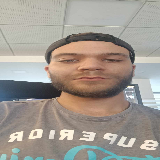

In [83]:
kian

In [84]:
np.around(np.array(danielle) / 255.0, decimals=12).shape

(160, 160, 3)

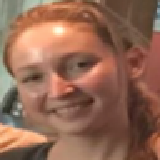

In [85]:
danielle

In [86]:
def verify(image_path, identity, database, model):
    
    encoding = img_to_encoding(image_path, model)
    dist = np.linalg.norm(tf.subtract(database[identity], encoding))
    if dist < 0.7:
        print("It's " + str(identity) + ", welcome in!")
        door_open = True
    else:
        print("It's not " + str(identity) + ", please go away")
        door_open = False
    return dist, door_open

In [87]:
distance, door_open_flag = verify("imed/imed5.jpg", "kian", database, FRmodel)
print("(", distance, ",", door_open_flag, ")")

It's kian, welcome in!
( 0.48738584 , True )


In [88]:
verify("imed/imed5.jpg", "kian", database, FRmodel)

It's kian, welcome in!


(0.48738584, True)

In [89]:
def who_is_it(image_path, database, model):
    
    encoding =  img_to_encoding(image_path, model)

    min_dist = 100

    for (name, db_enc) in database.items():

        dist = np.linalg.norm(tf.subtract(db_enc, encoding))

        if dist < min_dist:
            min_dist = dist
            identity = name

    if min_dist > 0.7:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))

    return min_dist, identity

In [90]:

# Test 1 with Younes pictures
who_is_it("imed/imed3.jpg", database, FRmodel)

# Test 2 with Younes pictures
test1 = who_is_it("imed/imed4.jpg", database, FRmodel)


# Test 3 with Younes pictures
test2 = who_is_it("imed/imedn.jpg", database, FRmodel)

Not in the database.
it's kian, the distance is 0.52913964
Not in the database.
